In [2]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
df=pd.read_csv('medical_insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(2772, 7)

In [6]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [8]:
df['charges']=df['charges'].round(2)

In [9]:
df['charges'].head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


In [10]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['charges'].isnull().sum()

0

In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [13]:
df['age'].mean()

39.10966810966811

In [14]:
df['charges'].mean().round(2)

13261.37

In [15]:
df['region'].max()

'southwest'

In [16]:
df['bmi'].mean()

30.70134920634921

In [17]:
df['smoker'].value_counts()

,count
smoker,
no,2208
yes,564


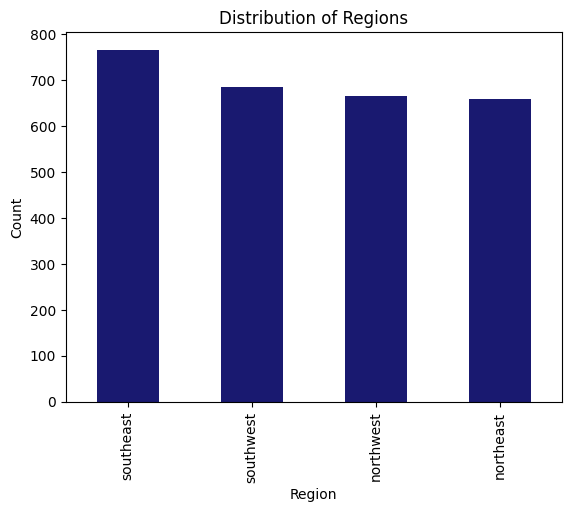

In [18]:
df['region'].value_counts().plot(kind='bar', color ='midnightblue')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.show()

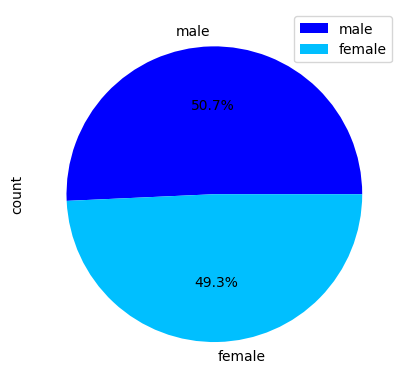

In [19]:
df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=('blue','deepskyblue'))
plt.legend()
plt.show()

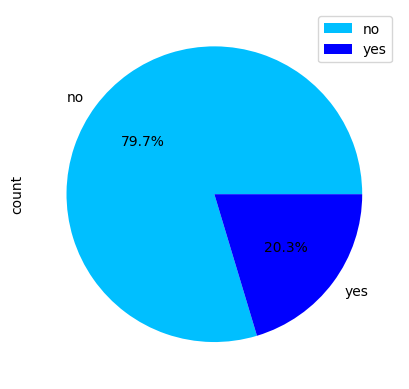

In [20]:
df['smoker'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=('deepskyblue','blue'))
plt.legend()
plt.show()

In [21]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [22]:
df[df['children'] == 5]['children'].count()

42

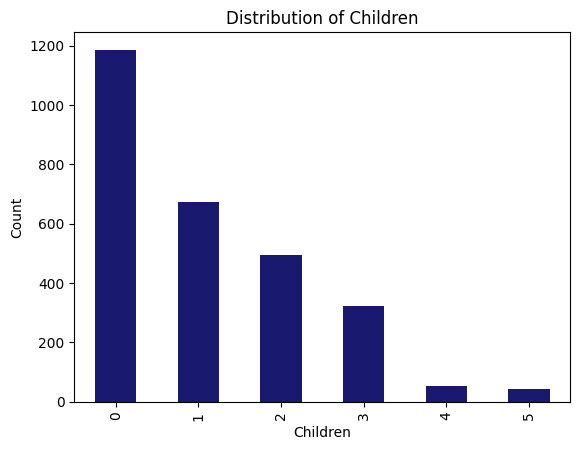

In [23]:
df['children'].value_counts().plot(kind='bar',color='midnightblue')
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Distribution of Children')
plt.show()

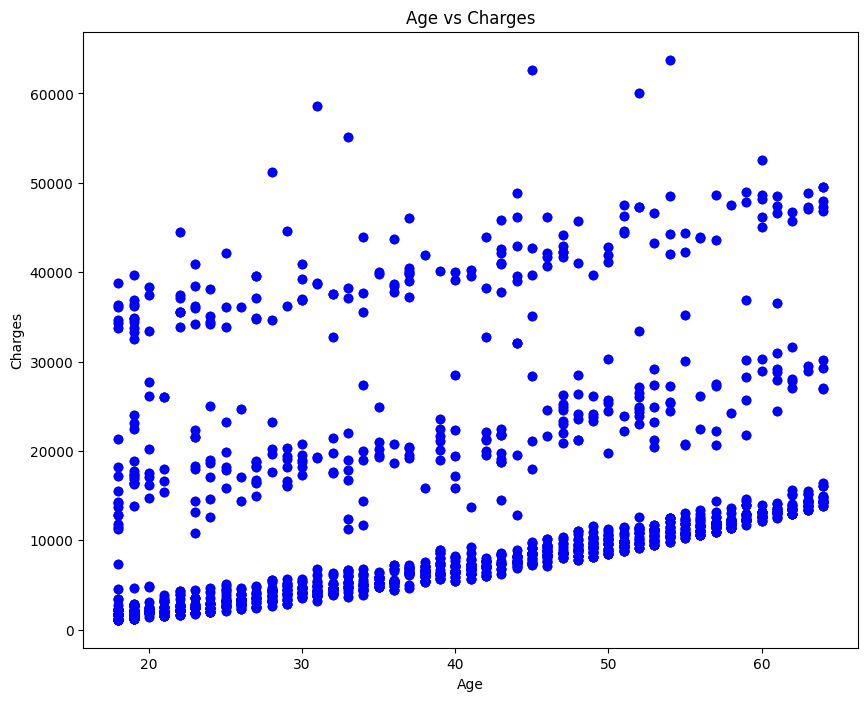

In [24]:
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.scatter(df['age'],df['charges'],color='b',marker='o')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

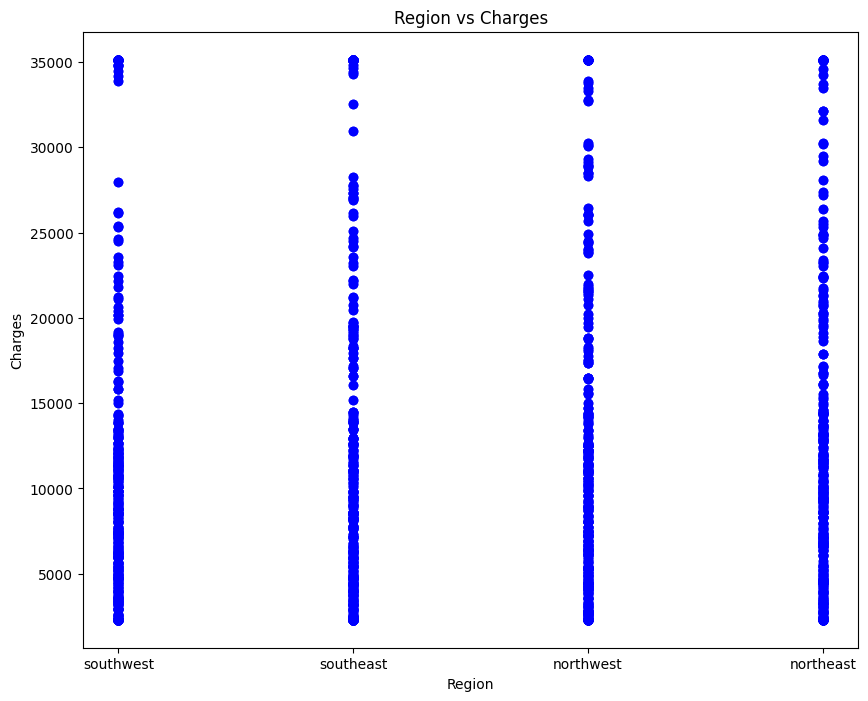

In [25]:
fig,ax1=plt.subplots(figsize=(10,8))
lb=df['charges'].quantile(0.10)
ub=df['charges'].quantile(0.90)
df['charges']=df['charges'].clip(lb,ub)
ax1.scatter(df['region'],df['charges'],color='b',marker='o')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs Charges')
plt.show()

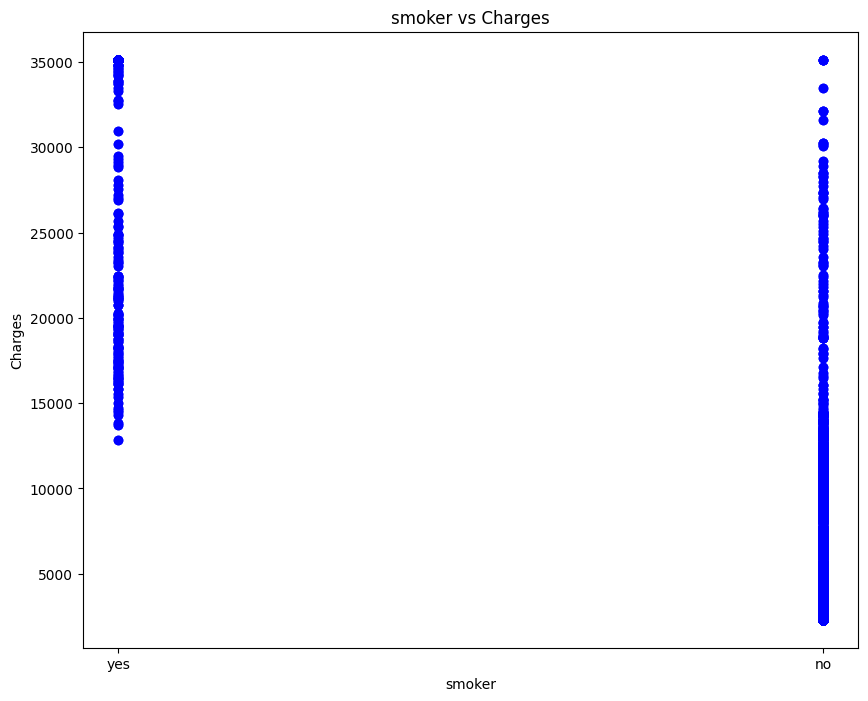

In [26]:
fig,ax1=plt.subplots(figsize=(10,8))
ax1.scatter(df['smoker'],df['charges'],color='b',marker='o')
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('smoker vs Charges')
plt.show()

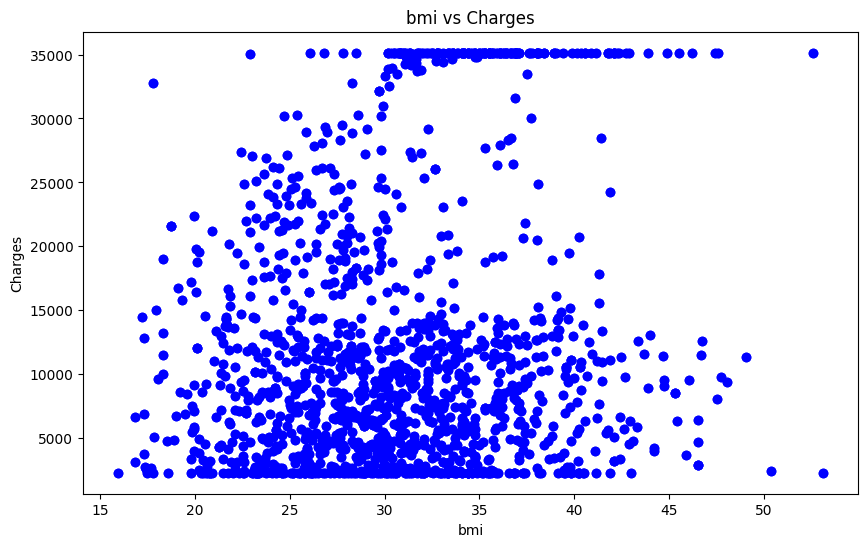

In [27]:
fig,ax1=plt.subplots(figsize=(10,6))
ax1.scatter(df['bmi'],df['charges'],color='b',marker='o')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.title('bmi vs Charges')
plt.show()

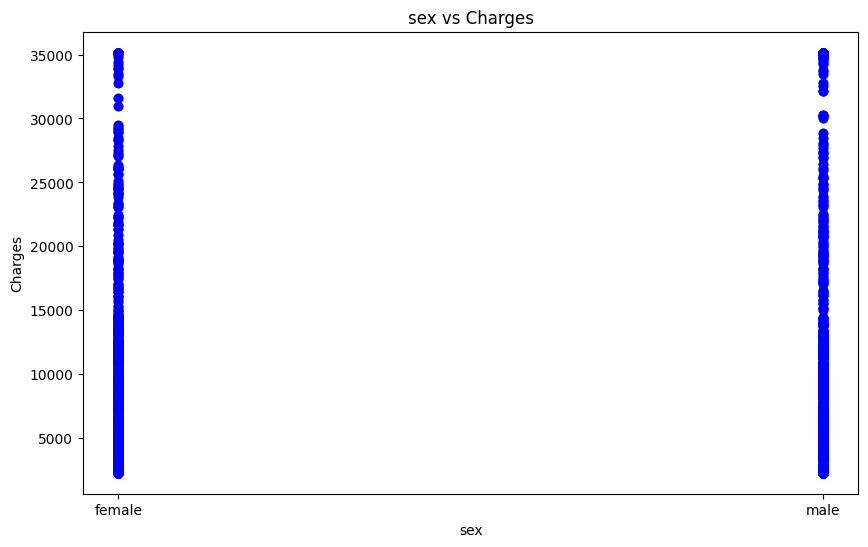

In [28]:
fig,ax1=plt.subplots(figsize=(10,6))
ax1.scatter(df['sex'],df['charges'],color='b',marker='o')
plt.xlabel('sex')
plt.ylabel('Charges')
plt.title('sex vs Charges')
plt.show()

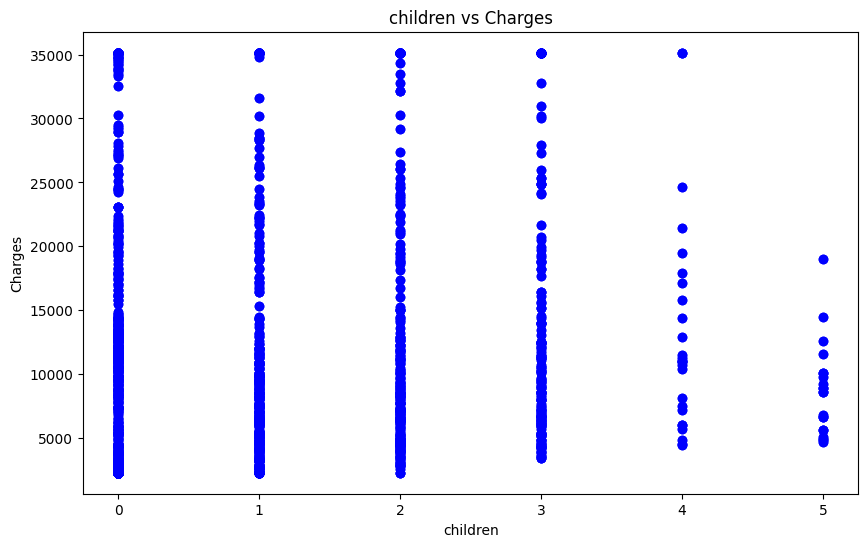

In [29]:
fig,ax1=plt.subplots(figsize=(10,6))
ax1.scatter(df['children'],df['charges'],color='b',marker='o')
plt.xlabel('children')
plt.ylabel('Charges')
plt.title('children vs Charges')
plt.show()

In [30]:
df_corr=df.copy()
label_enc = LabelEncoder()
df_corr['sex']=label_enc.fit_transform(df_corr['sex'])
df_corr['smoker']=label_enc.fit_transform(df_corr['smoker'])
df_corr['region']=label_enc.fit_transform(df_corr['region'])
df_corr.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92
1,18,1,33.770,1,0,2,2304.00
2,28,1,33.000,3,0,2,4449.46
3,33,1,22.705,0,0,1,21984.47
4,32,1,28.880,0,0,1,3866.86
5,31,0,25.740,0,0,2,3756.62
6,46,0,33.440,1,0,2,8240.59
7,37,0,27.740,3,0,1,7281.51
8,37,1,29.830,2,0,0,6406.41
9,60,0,25.840,0,0,1,28923.14


In [31]:
df_corr2=df_corr.corr()
df_corr2

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,0.000932,0.302887
sex,-0.026046,1.000000,0.042924,0.016020,0.082326,0.004808,0.060490
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.159178,0.165225
children,0.037574,0.016020,-0.001492,1.000000,0.006362,0.016111,0.066711
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,-0.006751,0.789454
region,0.000932,0.004808,0.159178,0.016111,-0.006751,1.000000,-0.022035
charges,0.302887,0.060490,0.165225,0.066711,0.789454,-0.022035,1.000000


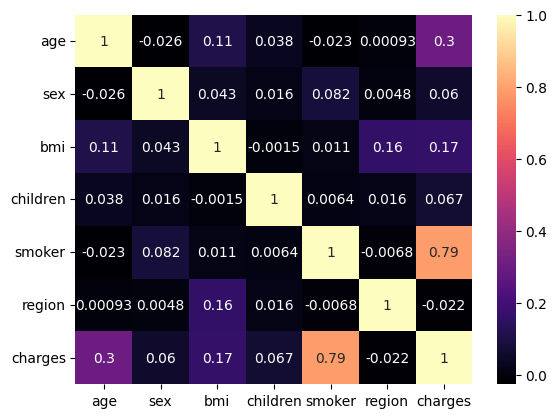

In [32]:
sns.heatmap(df_corr2,annot=True,cmap='magma')
plt.show()

In [33]:
X=df_corr.drop('charges',axis=1)
Y=df_corr['charges']

In [34]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [35]:
Y.head()

,charges
0,16884.92
1,2304.00
2,4449.46
3,21984.47
4,3866.86


In [36]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train

,age,sex,bmi,children,smoker,region
1864,21,1,36.850,0,0,2
1997,38,0,34.800,2,0,3
1336,21,0,25.800,0,0,3
655,52,0,25.300,2,1,2
261,20,0,26.840,1,1,2
...,...,...,...,...,...,...
1638,54,1,34.210,2,1,2
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0


In [38]:
X_test_scaled = scaler.transform(X_test)
X_test

,age,sex,bmi,children,smoker,region
1106,49,0,29.925,0,0,1
1321,62,1,26.695,0,1,0
2313,57,0,20.100,1,0,3
2274,22,1,39.500,0,0,3
1432,18,0,38.665,2,0,0
...,...,...,...,...,...,...
930,26,1,46.530,1,0,2
2610,41,1,23.940,1,0,0
1700,27,0,31.400,0,1,3
100,41,0,31.600,0,0,3


**LR**

In [39]:
lr = LinearRegression()
lr.fit(X_train_scaled,Y_train)

LinearRegression()

In [40]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train_scaled: (2217, 6)
Shape of Y_train: (2217,)


In [41]:
Y_pred = lr.predict(X_test_scaled)

In [42]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse

5313.492598494891

In [43]:
r_2= r2_score(Y_test, Y_pred)
r_2

0.7273966644873449

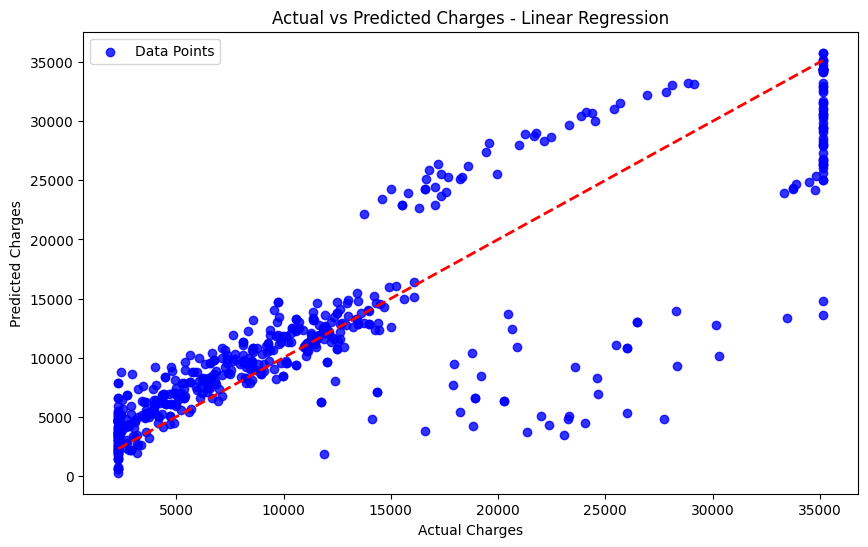

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.8, label='Data Points')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red',linewidth=2, linestyle='--')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges - Linear Regression")
plt.legend()
plt.show()

**DT**

In [45]:
dtr = DecisionTreeRegressor(random_state=42)

In [46]:
dtr.fit(X_train_scaled,Y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
Y_pred_dtr = dtr.predict(X_test_scaled)

In [48]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_dtr))
rmse

2997.7790258215323

In [49]:
r2 = r2_score(Y_test, Y_pred_dtr)
r2

0.9132298718316623

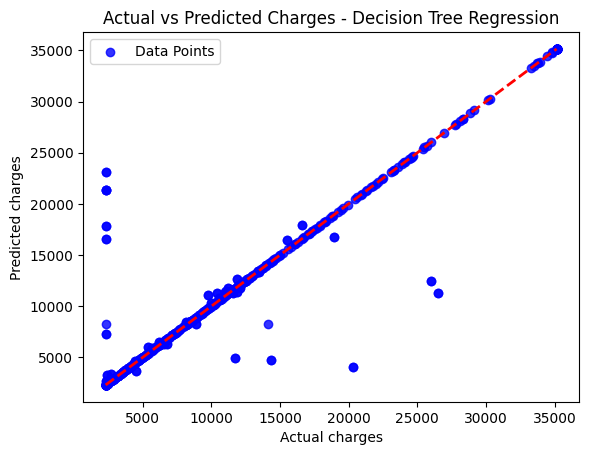

In [50]:
plt.scatter(Y_test, Y_pred_dtr, color='blue', alpha=0.8, label='Data Points')
plt.plot([min(Y_test),max(Y_test)] , [min(Y_test),max(Y_test)], color='red',linewidth=2, linestyle='--')
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted Charges - Decision Tree Regression")
plt.legend()
plt.show()

**RFG**

In [51]:
rfr = RandomForestRegressor(n_estimators=150, random_state=42)

In [52]:
rfr.fit(X_train_scaled,Y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [53]:
Y_pred_rfr=rfr.predict(X_test_scaled)

In [54]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_rfr))
rmse

2449.5893373994777

In [55]:
r2 = r2_score(Y_test, Y_pred_rfr)
r2

0.9420627908288016

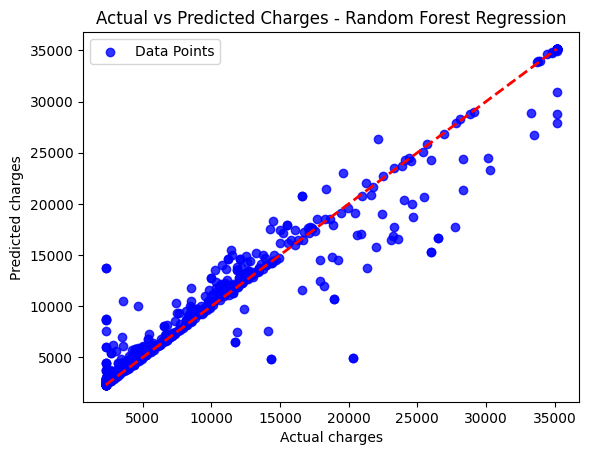

In [56]:
plt.scatter(Y_test, Y_pred_rfr, alpha = 0.8, color = 'blue', label='Data Points')
plt.plot([min(Y_test), max(Y_test)] , [min(Y_test), max(Y_test)], color='red',linewidth=2, linestyle='--')
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted Charges - Random Forest Regression")
plt.legend()
plt.show()

**KNN**

In [57]:
knn = KNeighborsRegressor(n_neighbors=3)

In [58]:
knn.fit(X_train_scaled,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
Y_pred_knn=knn.predict(X_test_scaled)

In [60]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_knn))
rmse

4267.790263575473

In [61]:
r2 = r2_score(Y_test, Y_pred_knn)
r2

0.8241359209408905

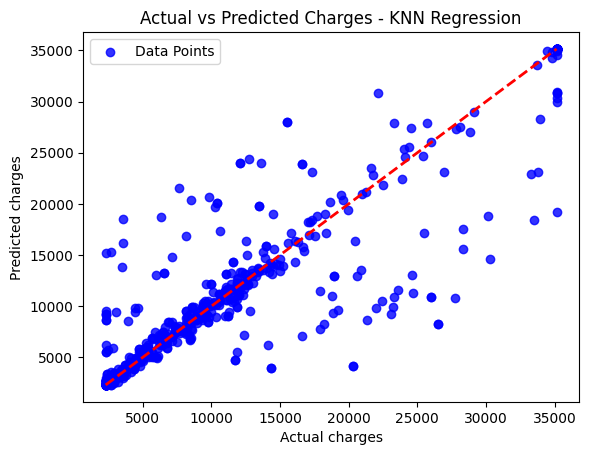

In [62]:
plt.scatter(Y_test, Y_pred_knn, alpha = 0.8, color = 'blue', label='Data Points')
plt.plot([min(Y_test), max(Y_test)] , [min(Y_test), max(Y_test)], color='red',linewidth=2,linestyle='--')
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted Charges - KNN Regression")
plt.legend()
plt.show()

**SVR**

In [63]:
from sklearn.pipeline import make_pipeline

In [64]:
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))

In [65]:
svr.fit(X_train_scaled,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [66]:
Y_pred_svr=svr.predict(X_test_scaled)

In [67]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
rmse

10457.625268506854

In [68]:
r2 = r2_score(Y_test, Y_pred_svr)
r2

-0.05593493051831877

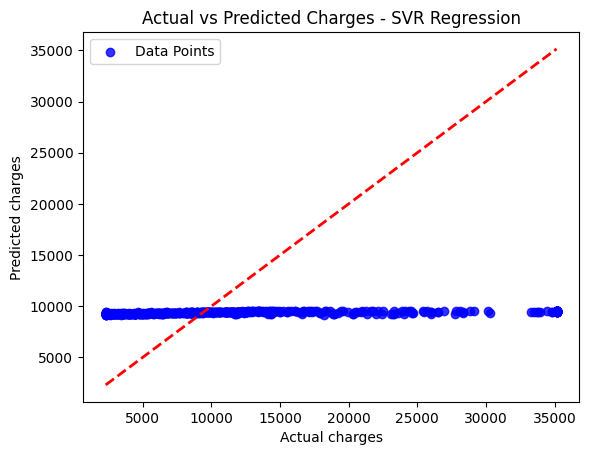

In [69]:
plt.scatter(Y_test, Y_pred_svr, alpha = 0.8, color = 'blue', label='Data Points')
plt.plot([min(Y_test), max(Y_test)] , [min(Y_test), max(Y_test)], color='red',linewidth=2, linestyle='--')
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted Charges - SVR Regression")
plt.legend()
plt.show()


**From all the models above we see that the best is RanomForestRegressor**

In [70]:
def prediction_rfr(new_input):
  prediction = rfr.predict(new_input)
  prediction.astype(int)
  return prediction

In [71]:
n = [60, 0, 25.8, 0, 0, 1]
#age	sex	bmi	children	smoker	region	charges

In [72]:
print(prediction_rfr([n])[0])

14739.36046666666


In [73]:
'''	31	0	25.740	0	0	2	3756.62
   	46	0	33.440	1	0	2	8240.59'''

'\t31\t0\t25.740\t0\t0\t2\t3756.62\n   \t46\t0\t33.440\t1\t0\t2\t8240.59'

In [74]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, Y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [75]:
rfr2 = RandomForestRegressor(n_estimators=150, random_state=42)

In [76]:
rfr2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [88]:
y_cv_pred = rfr2.predict(X_cv)


In [89]:
y_test_pred = rfr2.predict(X_test)

In [90]:
rmse = np.sqrt(mean_squared_error(y_cv, y_cv_pred))
rmse

3464.261934252213

In [80]:
def prediction_rfr_pt2(new_input):
  prediction = rfr2.predict(new_input)
  prediction = prediction.round(2)
  return print(prediction)

In [81]:
n = [19, 0, 28, 0, 1, 3]
#age	sex	bmi	children	smoker	region	charges

In [82]:
prediction_rfr_pt2([n])

[16912.61]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [83]:
import pickle as pkl

In [84]:
filename = 'med_model_rfr.sav'
with open(filename, 'wb') as file:
  pkl.dump(rfr2, file)

In [85]:
import sklearn
print(sklearn.__version__)

1.3.2
